# <div style="text-align:center">Approximation Methods</div>

## <span style="color:blue">Background</span>

\begin{equation}\
\hat{H}\Psi = E\Psi
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 1 \right )}
\end{equation}

So far we have solved the Schrödinger equation for model systems such as the hydrogen atom, particle in a box, harmonic oscilator, and rigid rotor. The simplicity of these model systems allowed us to obtain exact $\Psi$ and $E$  .However, going beyond these simple models may require the use of approximate methods for when exact solutions to the Schrödinger equation cannot be obtained. The two approximate methods we will discuss in this handout are the variational method and perturbation theory.

### 1 Variational Method

\begin{equation}\
\hat{H}\Psi_{0} = E_{0}\Psi_{0}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 2 \right )}
\end{equation}

The above Schrödinger equation is for an arbitrary system which has a ground-state wavefunction $\Psi_{0}$ and energy $E_{0}$. From equation 2 we can left multiply $\Psi_{0}$,

\begin{equation}\
\Psi_{0}^{*}\hat{H}\Psi_{0} = \Psi_{0}^{*}E_{0}\Psi_{0}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 3 \right )}
\end{equation}

Then from equation equation 3 we can solove for the energy $E_{0}$,

\begin{equation}\
\frac{\Psi_{0}^{*}\hat{H}\Psi_{0}}{\Psi_{0}^{*}\Psi_{0}} = E_{0}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 4 \right )}
\end{equation}

Finally from equation 4 we can integrate over all space,

\begin{equation}\
\frac{\int{\Psi_{0}^{*}\hat{H}\Psi_{0}\partial \tau}}{\int{\Psi_{0}^{*}\Psi_{0}}\partial \tau} = E_{0}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 5 \right )}.
\end{equation}

With equation 5 in hand, we can now approximate $\Psi_{0}$ by replacing it with a trial wavefunction $\Phi$, 

\begin{equation}\
\frac{\int{\Phi^{*}\hat{H}\Phi\partial \tau}}{\int{\Phi^{*}\Phi}\partial \tau} = E_{\Phi}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 6 \right )}
\end{equation}

that is a function of variational parameters $\alpha,\beta,\gamma,\delta,\ldots$  (i.e. $\Phi{(\alpha,\beta,\gamma,\delta,\ldots)}$), in which they are varied to minimize $E_{\Phi}$. The variational principle says that $E_{\Phi}$ is always an upper-bound of the exact energy $E_{0}$,

\begin{equation}\
E_{\Phi}(\alpha,\beta,\gamma,\delta,\ldots) \geq E_{0}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 7 \right )}.
\end{equation}

### 1.1 Variational Method - EXAMPLE 1 Harmonic Oscilator

Lets consider the Harmonic Hamiltonian operator,

\begin{equation}\
\hat{H} = -\frac{\hbar \partial^{2}}{2\mu \partial x^{2}} + \frac{1}{2}kx^{2}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 8 \right )}
\end{equation}

and a trial wavefunction $\Phi$,

\begin{equation}\
\Phi(x)=e^{(-\alpha x^{2})}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 9 \right )}
\end{equation}

where $\Phi$ only depends on one variational parameter $\alpha$ and the first and second terms in equation 8 are the kinetic and potiential energy operators respectively. We can now subsitute these expressions into equation 6 to obtain a variational energy $E_{\Phi}$, however, the Hamiltonian operator $\hat{H} = -\frac{\hbar \partial^{2}}{2\mu \partial x^{2}} + \frac{1}{2}kx^{2}$ will be in terms of natural units $\hat{H} = -\frac{\partial^{2}}{2\partial x^{2}} + \frac{1}{2}x^{2}$,

\begin{equation}\
\frac{\int{e^{(-\alpha x^{2})}(-\frac{\partial^{2}}{2\partial x^{2}} + \frac{1}{2}x^{2})e^{(-\alpha x^{2})}\partial x}}{\int{e^{(-\alpha x^{2})}e^{(-\alpha x^{2})}}\partial x} = E_{\Phi(x)}
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 10 \right )}.
\end{equation}

Equation 10 can be rewritten into two separate contributions the kinetic and potiential energy operator parts respectively,

\begin{equation}\
\frac{1}{2}\left (-\frac{\int{e^{(-\alpha x^{2})}(\frac{\partial^{2}}{\partial x^{2}})e^{(-\alpha x^{2})}\partial x}}{\int{e^{(-\alpha x^{2})}e^{(-\alpha x^{2})}}\partial x} + \frac{\int{e^{(-\alpha x^{2})}(x^{2})e^{(-\alpha x^{2})}\partial x}}{\int{e^{(-\alpha x^{2})}e^{(-\alpha x^{2})}}\partial x}\right )= E_{\Phi(x)} 
\ \ \ \ \ \ \ \ \ \
\mathbf{\left ( 11 \right )}.
\end{equation}

The goal now is to find the minimal $\alpha$ variational parameter that will minimize the harmonic oscilator energy.

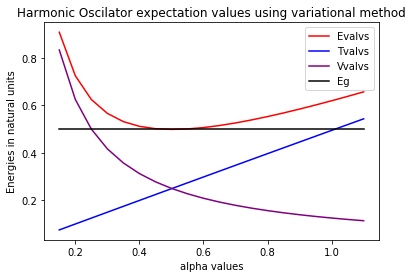

Min Gradient 0.024683640051230096
Alpha that minimizes Evals is 0.5
Minimum Eval is 0.5
True Ground state Energy is 0.5


In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Define constants in natural units
hbar = 1
k = 1
mu = 1

alpha0 = np.sqrt(k*mu/(hbar*hbar))

### fundamental frequency omega
omega = np.sqrt(k/mu)

### Energy eigenfunctions are localized no need
### to go to -infinity to infinity
x = np.linspace(-20,20,500)

def Trial_Wave(alpha,xt):
    return np.exp(-alpha*xt*xt)

def dfdx(ft,xt):
    dx = x[1]-x[0]
    ftp = np.zeros_like(ft)
    for i in range(0,len(ft)):
        if (i<(len(ft)-1)):
            rise = ft[i+1] - ft[i]
            ftp[i] = rise/dx
        else:
            rise = ft[i]-ft[i-1]
            ftp[i]= rise/dx
    return ftp
            
### given an array of function values ft
### evaluated at values of array xt, find
### the zero in the derivative and return
### the x-value that minimizes ft, the minimum
### in ft, the gradient at min(ft), and the index
### corresponding to the minimum value of the array ft
def FindMin(ft,xt):
    minresults = np.zeros(4)
    ftp = dfdx(ft,xt)
    mingrad = 1000
    minpos = 0
    minidx = 0
    minval = 0
    
    for i in range(0,len(ftp)):
        if (abs(ftp[i])<mingrad):
            mingrad = abs(ftp[i])
            minpos= xt[i]
            minval= ft[i]
            minidx = i
            
    minresults[0] = mingrad
    minresults[1] = minpos
    minresults[2] = minval
    minresults[3] = minidx
    return minresults

### returns T-hat operator acting upon a trial wavefuntion 
###(called ft)within the funtion
def TPhi(ft,xt):
    ftp = dfdx(ft,xt)
    ftpp = dfdx(ftp,xt)
    return -0.5*ftpp

### returns the kinetic energy functional of a trial wavefunction
### (called ft within the function)
def T_Functional(ft,xt):
    tphi = TPhi(ft,xt)
    dx = x[1] - x[0]
    num=0
    denom=0
    for i in range(0,len(ft)):
        num = num + ft[i]*tphi[i]*dx
        denom = denom + ft[i]*ft[i]*dx
        
    return num/denom

### returns V-hat operator acting upon a trial wavefunction
### (called ft within the function)
def VPhi(ft,xt):
    return 0.5*xt*xt*ft


### returns the potential energy functional of a trial wavefunction
### (called ft within the function)
def V_Functional(ft,xt):
    vphi = VPhi(ft,xt)
    dx = x[1]-x[0]
    num=0
    denom=0
    for i in range(0,len(ft)):
        num= num + ft[i]*vphi[i]*dx
        denom = denom + ft[i]*ft[i]*dx
        
    return num/denom

### Create arrays for alpha values
### T_functional values, V_funtional values
### and E_Funtional values along with true Eg

alpha = np.zeros(20)
Evals = np.zeros(20)
Tvals = np.zeros(20)
Vvals = np.zeros(20)
Eg    = np.zeros(20)
### loop over various alphas
for da in range(0,20):
    
    alpha[da] = 0.05*(da+3)
    
    ### evaluate trial wavefunction
    Phi_Trial = Trial_Wave(alpha[da],x)
    ### evaluate T_functional
    Tvals[da] = T_Functional(Phi_Trial,x)
    ### evaluate V_functional 
    Vvals[da] = V_Functional(Phi_Trial,x)
    ### compute E_Functional
    Evals[da] = Tvals[da] + Vvals[da]
    ### store true ground state energy for validation
    Eg[da] = np.sqrt(k/mu)*0.5
    
### plot T, V, E, Eg vs alpha
#plt.plot(alpha,Evals,'red',alpha, Tvals,'blue',alpha, Vvals,'purple',alpha, Eg, 'black')
plt.plot(alpha,Evals,'red',label='Evalvs')
plt.plot(alpha, Tvals,'blue',label='Tvalvs')
plt.plot(alpha, Vvals,'purple',label='Vvalvs')
plt.plot(alpha, Eg, 'black',label='Eg')
plt.legend()
plt.title('Harmonic Oscilator expectation values using variational method')
plt.xlabel('alpha values')
plt.ylabel('Energies in natural units')
plt.show()


### find minimum in E
minimum_array = FindMin(Evals, alpha)
print("Min Gradient", minimum_array[0])
print("Alpha that minimizes Evals is", minimum_array[1])
print("Minimum Eval is", minimum_array[1])
print("True Ground state Energy is", Eg[0])
    
#Phi_Trial = Trial_Wave(0.5,x)
#Phi_Prime = dfdx(Phi_Trial,x)
#Phi_Trial_LA = Trial_Wave(3,x)
#Phi_Trial_SA = Trial_Wave(0.1,x)

#plt.plot(x,Phi_Trial_LA, 'red', x, Phi_Trial_SA, 'blue')
#plt.show()

# The python code was borrowed from = https://www.youtube.com/watch?v=gZb1_VnMAtQ&t=0s

### 1.2 Variational Method - EXAMPLE 2 

### 1.2. Perturbation Theory

The energy of a particle in a 1D box is expressed as :<br/>
$E_{n} = \frac{n^{2}h^{2}}{8mL^{2}}$

### 1.3. PIB wavefunctions

This is a third section of this chapter. It has an interactive example as shown below

#### Example 1. Plot the PIB wavefunction for the quantum number $n$ and box dimension $L$.

First, let's define a function that calculates the wavefunction of PIB for a specified box dimension L and quantum number n:

In [5]:
# Use comments in your code cells to make the code more readible
# Make sure your code is clean and variables have readable names

# Import Python modules
import matplotlib.pyplot as plt
import numpy as np

# Define function to calculate PIB wavefunction for a specified box dimension L, quantum number n, and position x
def pib_wfn(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

Let's define parameters of our PIB model:

In [8]:
n = 3          # PIB quantum number
L = 10         # PIB dimension
n_points = 100 # number of points used for the plot

Now, let's plot the wavefunction:

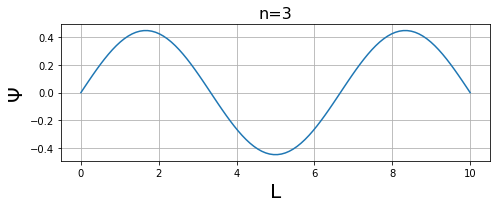

In [9]:
# Make sure that n is integer and n > 0
n = int(n)
if n < 1:
    raise Exception ("Quantum number n should be greater than 0")

# Define x points
x_points = np.linspace(0,L,n_points)

# Evaluate wavefunction at each x
wfn_values = pib_wfn(n, L, x_points)

# Set up graph and plot
plt.figure(figsize=(7,3))
plt.plot(x_points, wfn_values)
plt.xlabel("L", fontsize=20)
plt.ylabel("Ψ", fontsize=20)
plt.title("n="+str(n), fontsize=16)
plt.tight_layout()
plt.grid()


Now, go back and try choosing a different value of $n$!

### 1.4 Average position and momentum of PIB 

### 1.5 Particle in a finite box

## <span style="color:blue">2. Exercises</span>

### 2.1. Exercise 1. 